## LAB-9
### Name: Harshitha Anishetty
### StudenID: 8903318

### Dense Neural Network
#### 1. Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with (2 points).

##### Import libraries

In [405]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


##### Load the fMNIST dataset

In [406]:

(train_images, train_labels), (test_images,
                               test_labels) = fashion_mnist.load_data()

##### Explore dataset properties

In [407]:
# Check the shape of training and testing data
print("Training set shape:", train_images.shape)
print("Number of training samples:", len(train_images))
print("Image dimensions:", train_images[0].shape)

print("Test set shape:", test_images.shape)
print("Number of test samples:", len(test_images))

# Check the number of classes (categories) in the dataset
num_classes = len(np.unique(train_labels))
print("Number of classes:", num_classes)


Training set shape: (60000, 28, 28)
Number of training samples: 60000
Image dimensions: (28, 28)
Test set shape: (10000, 28, 28)
Number of test samples: 10000
Number of classes: 10


##### Visualize some sample images

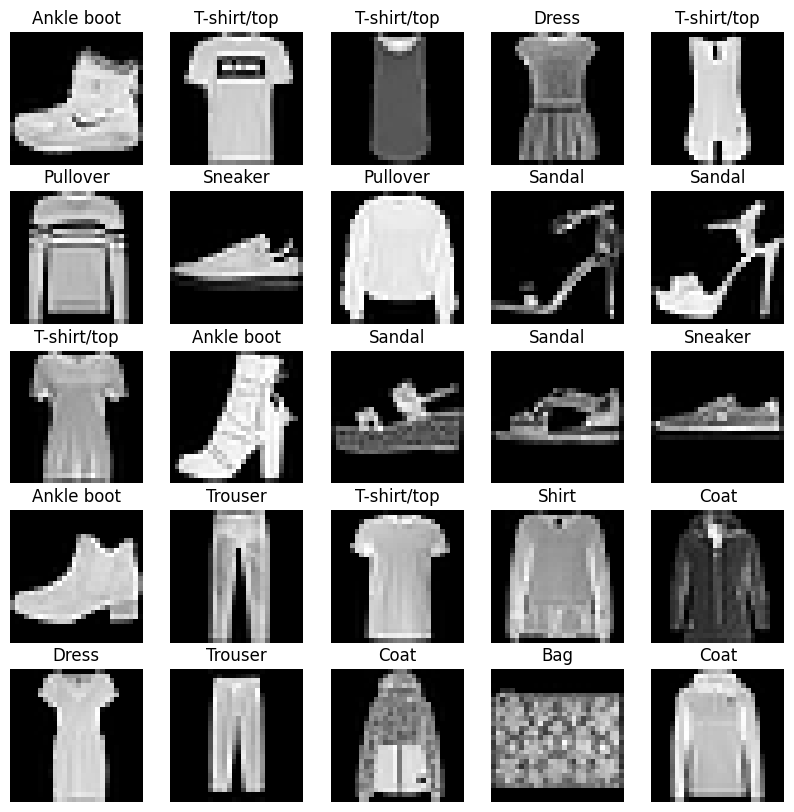

In [408]:
# Define class names for better understanding of the labels
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot sample images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_labels[train_labels[i]])
    plt.axis('off')
plt.show()


##### Check class distribution

In [409]:
# Class distribution in the training set
unique_classes, class_counts = np.unique(train_labels, return_counts=True)
print("Class distribution in the training set:")
for cls, count in zip(unique_classes, class_counts):
    print(f"Class {cls}: {count} samples")


Class distribution in the training set:
Class 0: 6000 samples
Class 1: 6000 samples
Class 2: 6000 samples
Class 3: 6000 samples
Class 4: 6000 samples
Class 5: 6000 samples
Class 6: 6000 samples
Class 7: 6000 samples
Class 8: 6000 samples
Class 9: 6000 samples


##### The fMNIST dataset is a variation of the popular MNIST dataset but contains grayscale images of various fashion items. It consists of 60,000 training samples and 10,000 test samples. Each image is of size 28x28 pixels.
##### The class distribution in the training set is relatively balanced, with an equal number of samples for each class.
##### This exploration is essential to understand the dataset's structure and class balance, which can guide the model building process and data preprocessing.

#### 2. Train a dense neural network using Keras (2 points)

##### Prepare the data

In [410]:
# Normalize pixel values to range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Flatten the images for the dense neural network
train_images = train_images.reshape((60000, 784))
test_images = test_images.reshape((10000, 784))

##### Build the dense neural network model

In [411]:
model = Sequential([
    Flatten(input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

##### Compile the model

In [412]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

##### Train the model

In [413]:
num_epochs = 5
batch_size = 32

model.fit(train_images, train_labels, epochs=num_epochs,
                    batch_size=batch_size, validation_split=0.1)


Epoch 1/5
1688/1688 [==============================] - 8s 4ms/step - loss: 0.4979 - accuracy: 0.8264 - val_loss: 0.3987 - val_accuracy: 0.8553
Epoch 2/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3730 - accuracy: 0.8634 - val_loss: 0.3515 - val_accuracy: 0.8722
Epoch 3/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3363 - accuracy: 0.8761 - val_loss: 0.3338 - val_accuracy: 0.8768
Epoch 4/5
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3101 - accuracy: 0.8854 - val_loss: 0.3461 - val_accuracy: 0.8725
Epoch 5/5
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2914 - accuracy: 0.8916 - val_loss: 0.3431 - val_accuracy: 0.8777


##### The model has two hidden layers with ReLU activation functions and an output layer with softmax activation for multi-class classification. The training process is performed for a specified number of epochs (5 in this case) with a specified batch size (32 in this case).

#### 3. Evaluate its accuracy. Report accuracy, confusion metric, explore specific examples of incorrect classification, and drew some conclusions from this exploration (2 points)

##### Evaluate the model

In [414]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)


313/313 [==============================] - 1s 2ms/step - loss: 0.3596 - accuracy: 0.8719
Test accuracy: 0.8719000220298767


##### Compute the confusion matrix

In [415]:
# Get predicted labels for the test set
predicted_labels = model.predict(test_images)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Generate the confusion matrix
confusion_mat = tf.math.confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion_mat)

313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
tf.Tensor(
[[819   1  11  59   5   0  95   0  10   0]
 [  3 964   0  24   5   0   2   0   2   0]
 [ 17   2 757  17 178   0  26   0   3   0]
 [ 19   7   9 916  23   0  22   0   4   0]
 [  0   0  75  47 856   0  20   0   2   0]
 [  0   0   0   0   0 959   0  29   1  11]
 [130   2  93  39 149   0 572   0  15   0]
 [  0   0   0   0   0  14   0 924   1  61]
 [  3   0   3   4   5   2   2   3 978   0]
 [  0   0   0   0   0   6   1  19   0 974]], shape=(10, 10), dtype=int32)


##### Explore specific examples of incorrect classification

Total number of incorrect indices 1281


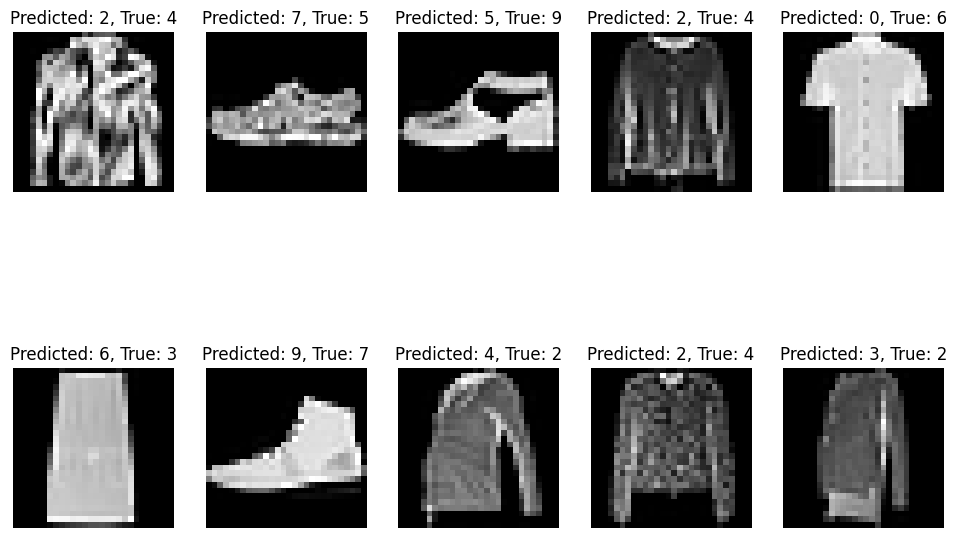

In [416]:
# indices of misclassified samples
misclassified_indices = np.where(test_labels != predicted_labels)[0]
print('Total number of incorrect indices', len(misclassified_indices))
# misclassified samples with their predicted and true labels
plt.figure(figsize=(12, 8))
for i, index in enumerate(misclassified_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
    plt.title(
        f"Predicted: {predicted_labels[index]}, True: {test_labels[index]}")
    plt.axis('off')
plt.show()


##### CONCLUSION

##### Analyzing misclassified examples can reveal patterns or common features that the model struggles to recognize.
##### Consider addressing class imbalances or refining the model architecture to improve accuracy on challenging classes.
##### Further analysis and experimentation are essential to fine-tune the model for better generalization.